##EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Data loading..:

In [ ]:
# Load the dataset
data = pd.read_csv('/content/pcos_prediction_dataset.csv')

# Show the first few rows
data.head()

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No


#### Data Inspection..:
- Statistical DI.

In [ ]:
# Inspect the dataset
print("Dataset Shape:", data.shape)  # Rows, Columns
print("--------------------------")
print("Column Names:", data.columns)  # Column Names
print("--------------------------")
print("Data Types:\n", data.dtypes)  # Data types for each column
print("--------------------------")
print("Missing Values:\n", data.isnull().sum())  # Null values in each column

Dataset Shape: (120000, 17)
--------------------------
Column Names: Index(['Country', 'Age', 'BMI', 'Menstrual Regularity', 'Hirsutism',
       'Acne Severity', 'Family History of PCOS', 'Insulin Resistance',
       'Lifestyle Score', 'Stress Levels', 'Urban/Rural',
       'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns',
       'Undiagnosed PCOS Likelihood', 'Ethnicity', 'Diagnosis'],
      dtype='object')
--------------------------
Data Types:
 Country                         object
Age                              int64
BMI                             object
Menstrual Regularity            object
Hirsutism                       object
Acne Severity                   object
Family History of PCOS          object
Insulin Resistance              object
Lifestyle Score                  int64
Stress Levels                   object
Urban/Rural                     object
Socioeconomic Status            object
Awareness of PCOS               object
Fertility Concerns      

In [42]:
# Extract unique values for each column
exclude_columns = ['Age','Lifestyle Score','Undiagnosed PCOS Likelihood','Country','log_transformed']

for col in data.columns:
    if col not in exclude_columns:
        unique_values = data[col].unique()
        print(f"For {col} unique values are: {unique_values}")

For BMI unique values are: ['Overweight' 'Underweight' 'Normal' 'Obese']
For Menstrual Regularity unique values are: ['Regular' 'Irregular']
For Hirsutism unique values are: ['Yes' 'No']
For Acne Severity unique values are: ['Severe' nan 'Moderate' 'Mild']
For Family History of PCOS unique values are: ['Yes' 'No']
For Insulin Resistance unique values are: ['Yes' 'No']
For Stress Levels unique values are: ['Low' 'High' 'Medium']
For Urban/Rural unique values are: ['Rural' 'Urban']
For Socioeconomic Status unique values are: ['High' 'Middle' 'Low']
For Awareness of PCOS unique values are: ['Yes' 'No']
For Fertility Concerns unique values are: ['No' 'Yes']
For Ethnicity unique values are: ['Hispanic' 'Other' 'Caucasian' 'African' 'Asian']
For Diagnosis unique values are: ['Yes' 'No']


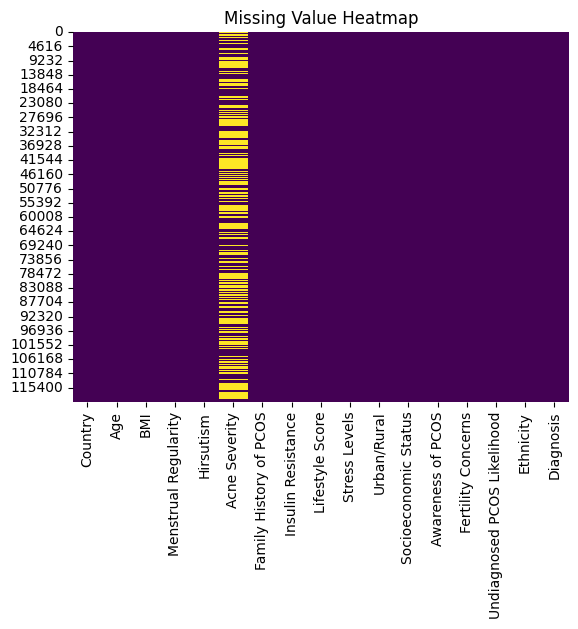

In [ ]:
# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()


In [ ]:
data.describe()

,Age,Lifestyle Score,Undiagnosed PCOS Likelihood
count,120000.000000,120000.000000,120000.000000
mean,31.980508,5.506567,0.149937
std,10.096799,2.871052,0.057786
min,15.000000,1.000000,0.050001
25%,23.000000,3.000000,0.099820
50%,32.000000,6.000000,0.149844
75%,41.000000,8.000000,0.200061
max,49.000000,10.000000,0.249998


In [ ]:
data.describe(include=['object'])

--------------------------


,Country,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Ethnicity,Diagnosis
count,120000,120000,120000,120000,59915,120000,120000,120000,120000,120000,120000,120000,120000,120000
unique,77,4,2,2,3,2,2,3,2,3,2,2,5,2
top,Burkina Faso,Normal,Regular,No,Mild,No,No,Medium,Urban,Middle,Yes,No,African,No
freq,1667,60080,83941,72039,35822,84028,90183,59959,83943,59860,71891,72205,24285,107405


Skewness and Kurtosis: Skewness measures asymmetry, while kurtosis measures the "tailedness" of the distribution.

In [ ]:
# Calculate skewness and kurtosis for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    print(f"{col} - Skewness: {data[col].skew()}, Kurtosis: {data[col].kurtosis()}")

Age - Skewness: 0.0033867035814075692, Kurtosis: -1.1979108331930317
Lifestyle Score - Skewness: -0.00420945889850548, Kurtosis: -1.2217252532928147
Undiagnosed PCOS Likelihood - Skewness: 0.0041530975284056965, Kurtosis: -1.200391902801308


#### Data Inspection..:
- Visual DI.

Histograms & Density Plots : These plots help to visualize the distribution of numerical variables.

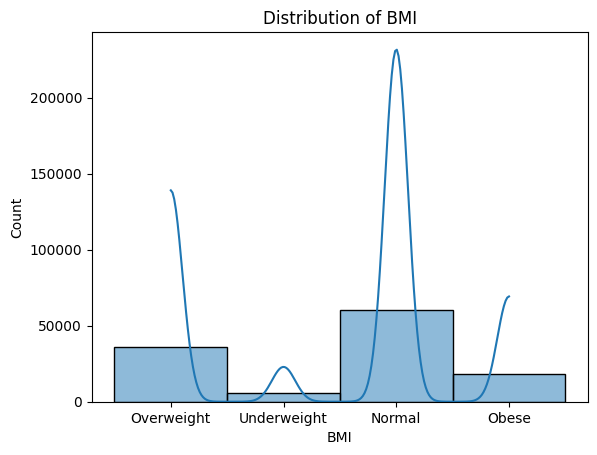

In [ ]:
# Plot histogram for a single column
sns.histplot(data['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.show()

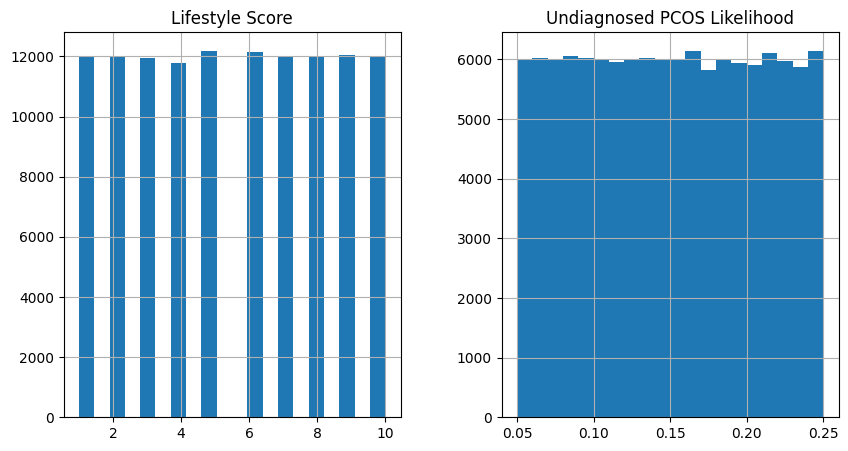

In [ ]:
# Plot histograms for multiple columns
data[['BMI', 'Lifestyle Score','Undiagnosed PCOS Likelihood']].hist(bins=20, figsize=(10, 5))
plt.show()

Advanced Histograms:

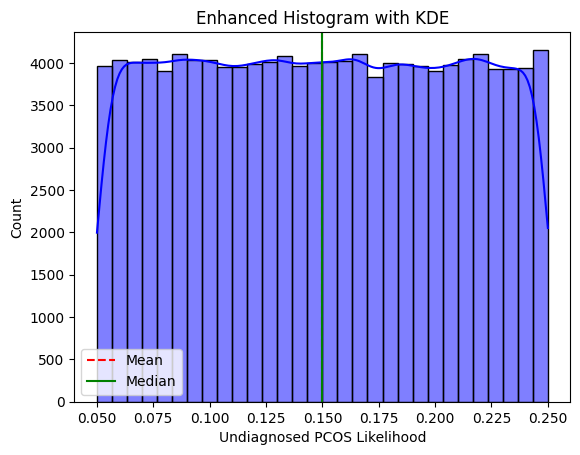

In [ ]:
# Advanced histogram with kernel density estimate
sns.histplot(data['Undiagnosed PCOS Likelihood'], kde=True, bins=30, color='blue')
plt.axvline(data['Undiagnosed PCOS Likelihood'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['Undiagnosed PCOS Likelihood'].median(), color='green', linestyle='-', label='Median')
plt.legend()
plt.title('Enhanced Histogram with KDE')
plt.show()


Faceted Histograms : Histograms grouped by a categorical variable.

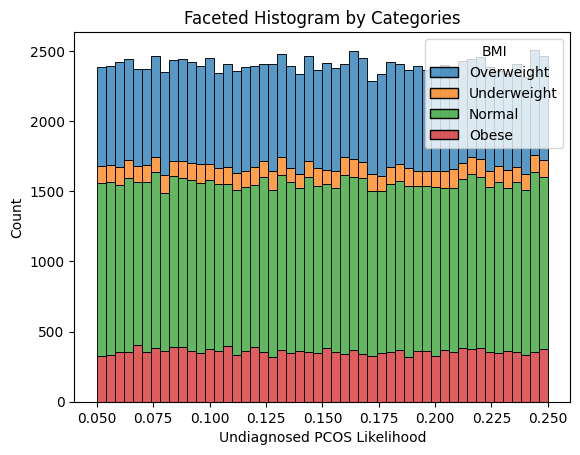

In [ ]:
# Faceted histogram for categorical groups
sns.histplot(data=data, x='Undiagnosed PCOS Likelihood', hue='BMI', multiple='stack')
plt.title('Faceted Histogram by Categories')
plt.show()


Boxplots: are useful for spotting outliers and understanding the spread of data.

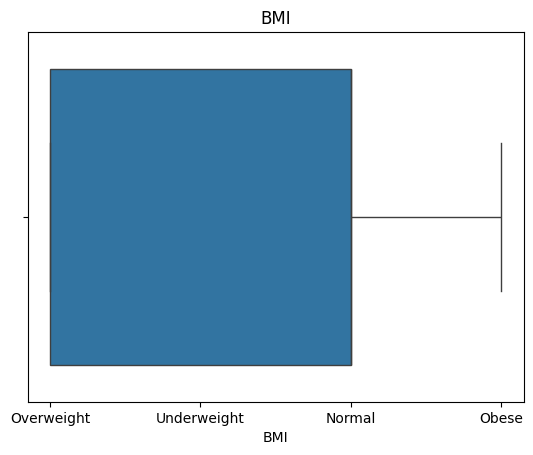

In [ ]:
# Boxplot for a single column
sns.boxplot(x=data['BMI'])
plt.title('BMI')
plt.show()

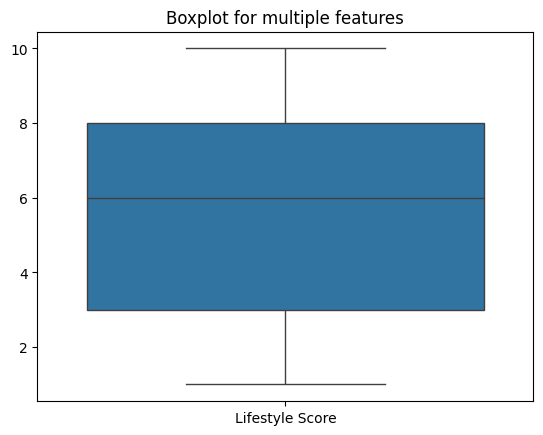

In [ ]:
# Boxplot for multiple features
sns.boxplot(data=data[['BMI', 'Lifestyle Score']])
plt.title('Boxplot for multiple features')
plt.show()

Pairplot : give a quick visual of relationships between numerical features.

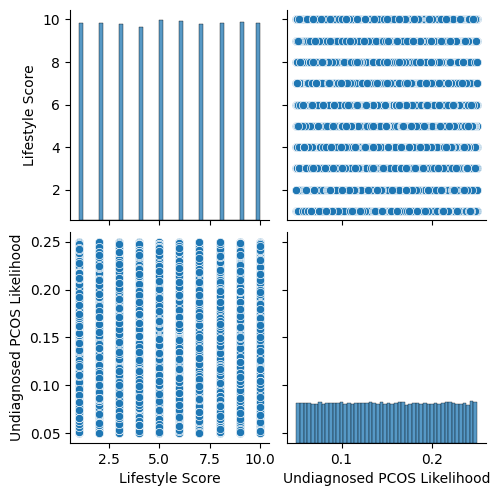

In [ ]:
# Pairplot for numerical features
sns.pairplot(data[['BMI', 'Lifestyle Score','Undiagnosed PCOS Likelihood']])
plt.show()

Countplot : show the distribution of categorical variables.

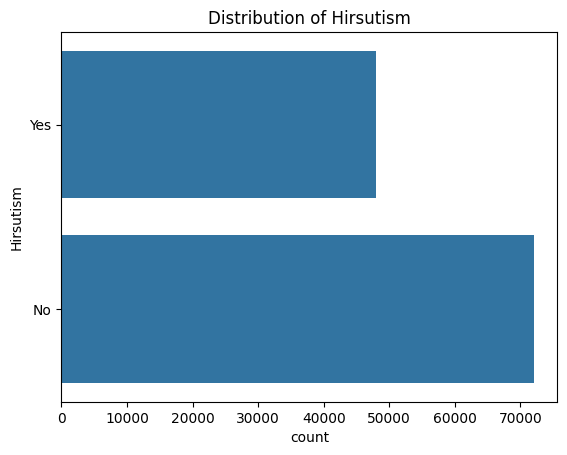

In [ ]:
# Countplot for a categorical column
sns.countplot(data['Hirsutism'])
plt.title('Distribution of Hirsutism')
plt.show()

#### Feature Relationships
- Exploring the relationship between features and the target variable is an important part of EDA.

Correlation Matrix : can help you understand how features relate to each other and the target variable.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Scatter Plots: are helpful to visualize relationships between two numerical variables.

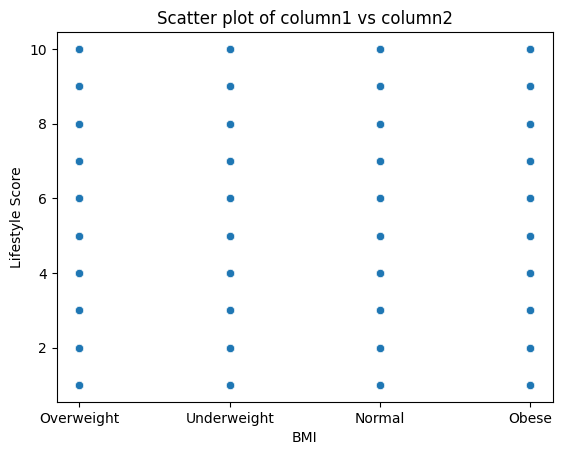

In [ ]:
# Scatter plot between two numerical variables
sns.scatterplot(x=data['BMI'], y=data['Lifestyle Score'])
plt.title('Scatter plot of column1 vs column2')
plt.show()


Logarithmic Transformation : For numerical features with high skewness, apply log transformation to normalize the distribution.

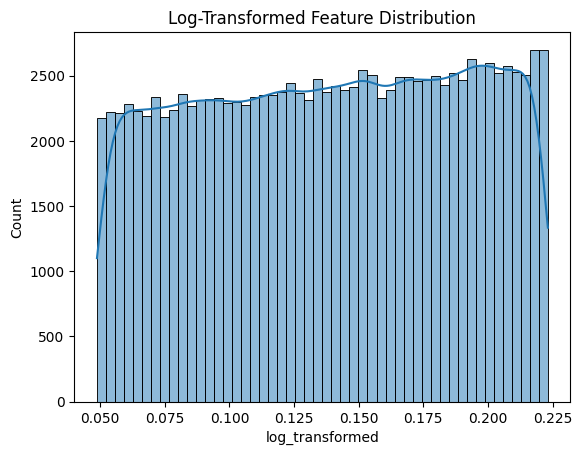

In [ ]:
# Log transformation of a highly skewed numerical column
data['log_transformed'] = np.log1p(data['Undiagnosed PCOS Likelihood'])
sns.histplot(data['log_transformed'], kde=True)
plt.title('Log-Transformed Feature Distribution')
plt.show()


Categorical vs. Numerical Relationships :
Use boxplots or violin plots to analyze the distribution of numerical values across categories.

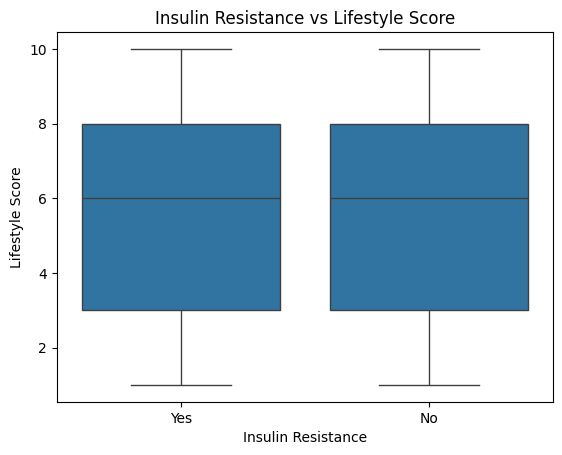

In [ ]:
# Boxplot for categorical vs numerical
sns.boxplot(x=data['Insulin Resistance'], y=data['Lifestyle Score'])
plt.title('Insulin Resistance vs Lifestyle Score')
plt.show()

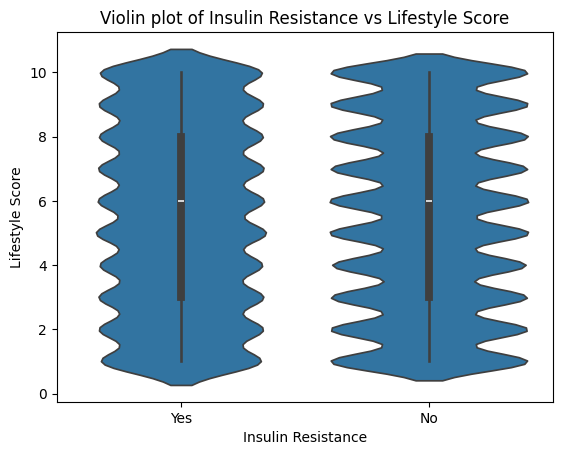

In [ ]:
# Violin plot for categorical vs numerical
sns.violinplot(x=data['Insulin Resistance'], y=data['Lifestyle Score'])
plt.title('Violin plot of Insulin Resistance vs Lifestyle Score')
plt.show()

Correlation Analysis : is vital to understand how features are related to each other, especially for numerical variables.

In [ ]:
# Pearson correlation for numerical variables
correlation = data.corr(method='pearson')

# Display the correlation matrix as a heatmap
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Feature Correlation')
plt.show()

#### Outlier Detection :
Outliers can skew the model’s learning, and identifying them is crucial.

- Using Boxplots: Outliers will typically be outside the "whiskers" of the boxplot.
- Using Z-scores: Z-scores can help identify data points that deviate significantly from the mean.

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(data.select_dtypes(include=['float64', 'int64']))

# Convert Z-scores into a dataframe for better readability
z_scores_df = pd.DataFrame(z_scores, columns=data.select_dtypes(include=['float64', 'int64']).columns)

# Filter rows with Z-scores above a threshold (e.g., 3)
outliers = (z_scores_df > 1).sum(axis=1)
print(f"Outliers count: {outliers[outliers > 0]}")

Outliers count: 3         1
4         1
5         1
6         2
8         1
         ..
119988    1
119990    1
119994    1
119997    2
119999    1
Length: 59269, dtype: int64


#### Advanced Feature Engineering:

Binning: Categorize a numerical variable into bins.

In [ ]:
# Create bins for numerical data
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
data['binned_feature'] = pd.cut(data['numerical_column'], bins=bins, labels=labels)
print(data['binned_feature'].value_counts())

One-Hot Encoding : Convert categorical features into numerical representation.

In [ ]:
# One-hot encoding using Pandas
data_encoded = pd.get_dummies(data, columns=['BMI'], drop_first=True)
print(data_encoded.head())


#### Scaling and Normalization:

Min-Max Scaling :
Scales features to a range of 0 to 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['scaled_feature']] = scaler.fit_transform(data[['numerical_column']])

Standardization :
Scales features to have a mean of 0 and standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['standardized_feature']] = scaler.fit_transform(data[['numerical_column']])